All'interno di questo link ci sono i toy dataset: i dataset più utilizzati per fare prove ed esperimenti con il machine learning

https://scikit-learn.org/stable/datasets/toy_dataset.html



# IRIS DATASET

Il **DATASET IRIS** contiene la misurazione di centocinquanta specie di fiori iris di tre diverse specie: *Setosa*, *Versicolo* e *Virginica*. Qui, ogni campione di fiore rappresenta una riga del dataset e la misurazione del fiore in centimetri viene indicata in colonne, che rappresentano le caratteristiche del dataset.

IRIS DATASET. 

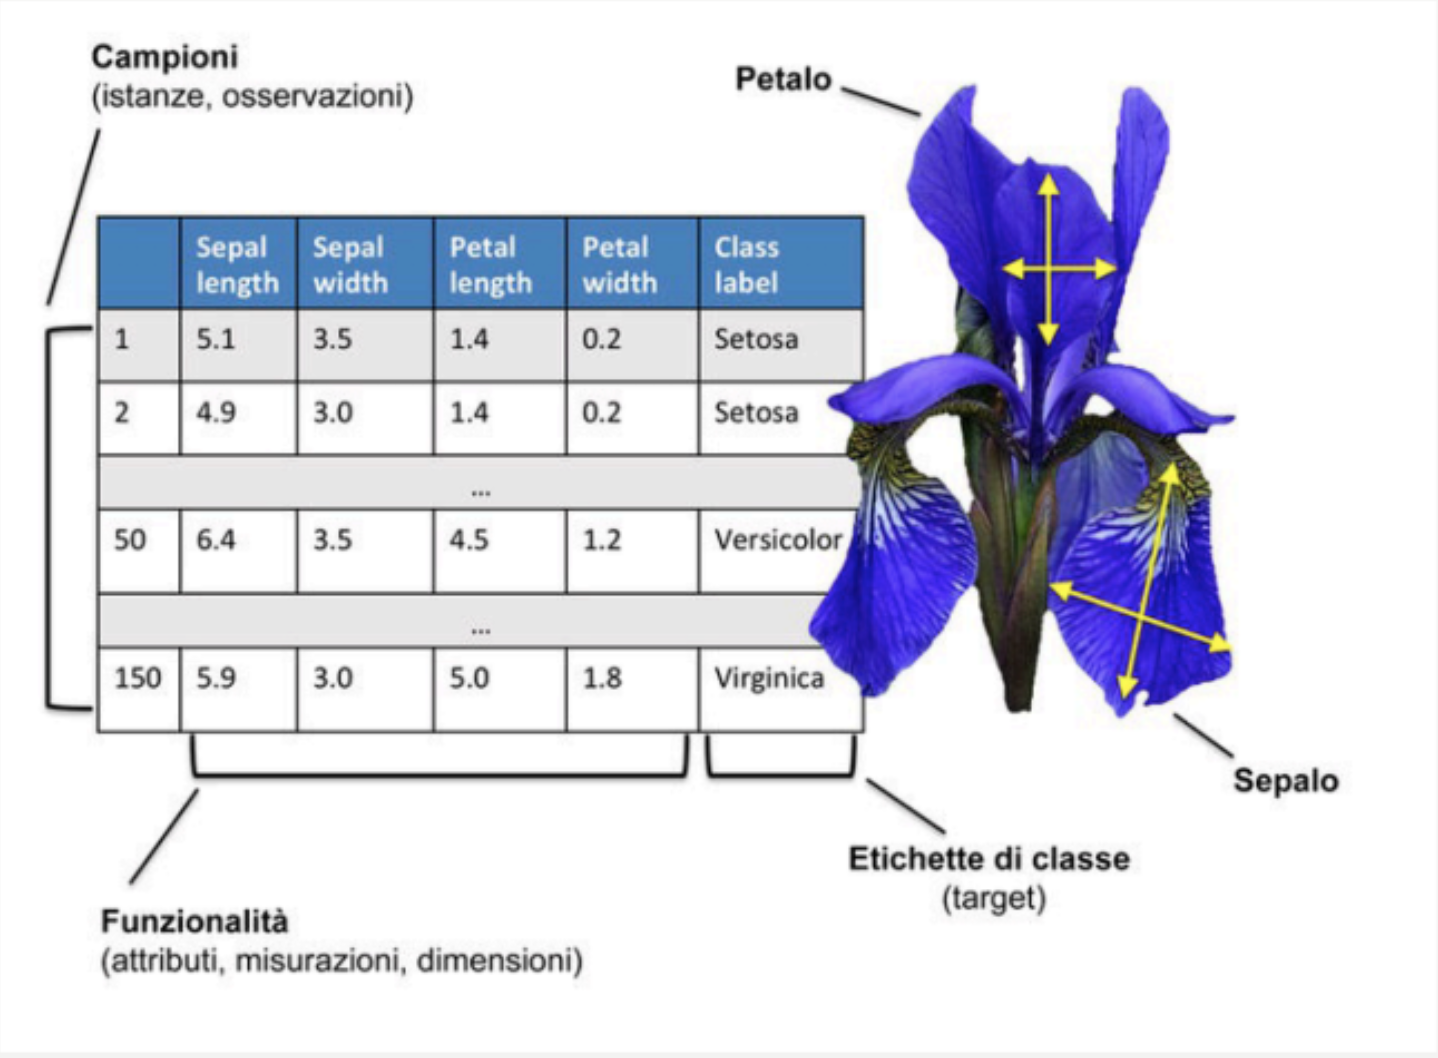

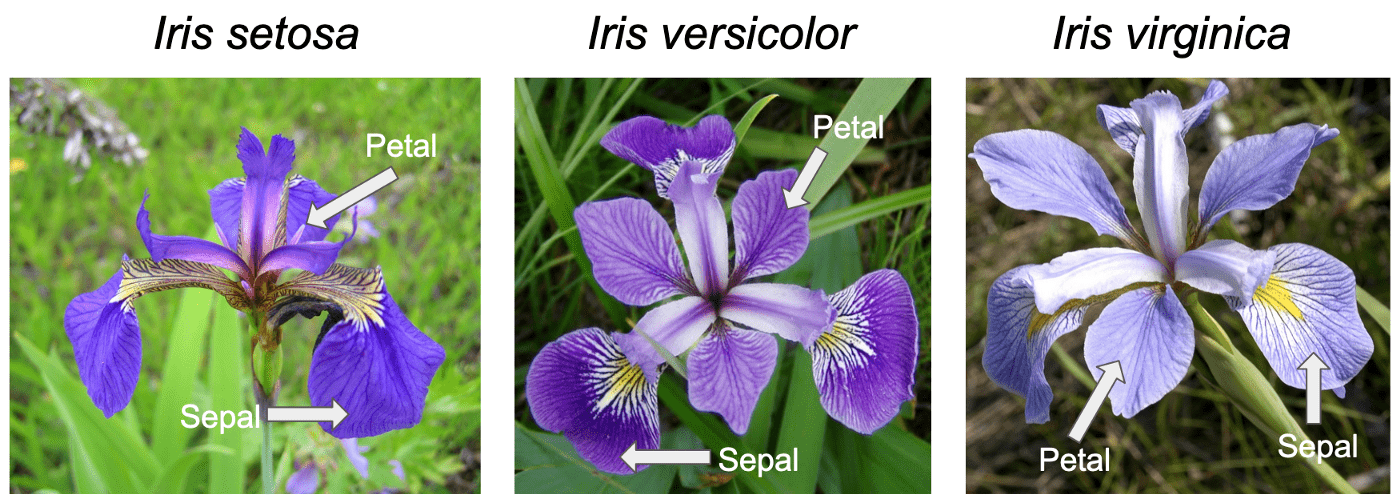

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
import os
from google.colab import drive
from sklearn.decomposition import PCA


In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()
#Aspect of iris dataset imported from sklearn.datasets
print(iris)

In [ ]:
# Import dataset from CSV file stored on drive
drive.mount('/content/drive')
iris = pd.read_csv("/content/drive/MyDrive/Iris.csv") 
iris.head()
iris_data=iris.iloc[:,1:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Aspect of iris dataset imported from CSV file
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

##  Exploratory Data Analysis EDA


The pandas.describe() function is used to get a descriptive statistics summary of a given dataframe. This includes mean, count, std deviation, percentiles, and min-max values of all the features.

In [ ]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Check for null values

In [ ]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Count Species

In [ ]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Data Type

In [ ]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Analysing the data **visually**

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

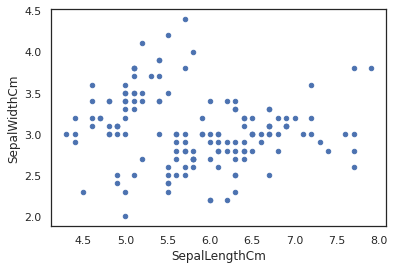

In [ ]:
iris_data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

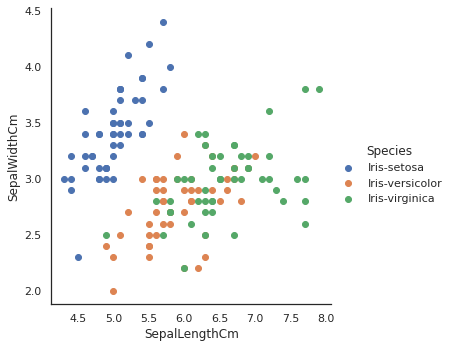

In [ ]:
sns.FacetGrid(iris_data, hue="Species", height=5, aspect=1).map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

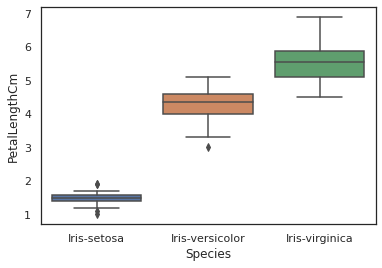

In [ ]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris_data)

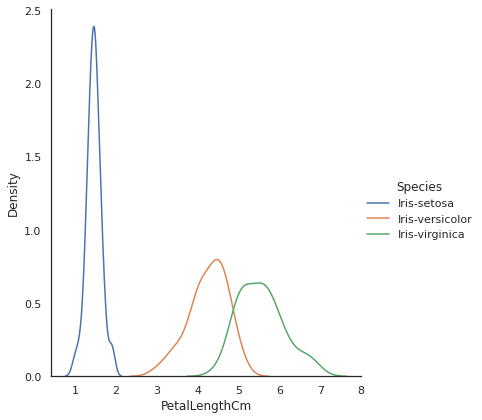

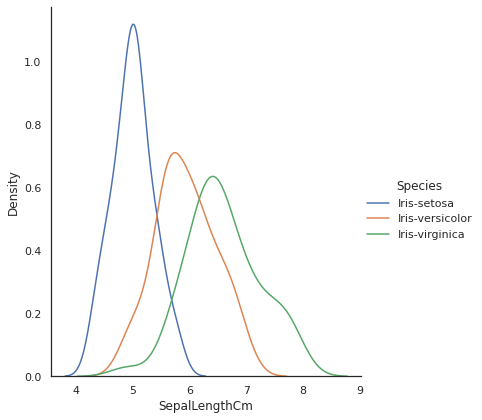

In [ ]:
sns.FacetGrid(iris_data, hue="Species", height=6, aspect=.90).map(sns.kdeplot, "PetalLengthCm").add_legend()
sns.FacetGrid(iris_data, hue="Species", height=6, aspect=.90).map(sns.kdeplot, "SepalLengthCm").add_legend()

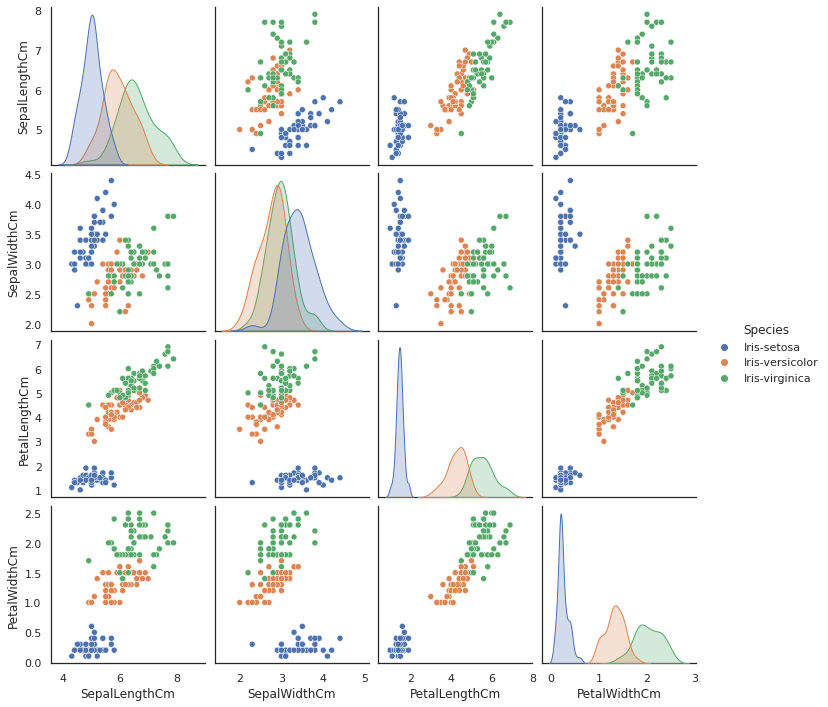

In [ ]:
	sns.pairplot(iris_data, hue='Species')

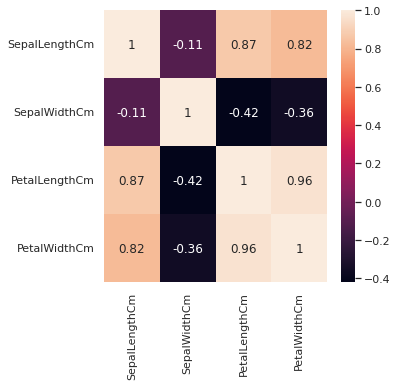

In [ ]:
#get correlations of each features in dataset
corrmat = iris_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(iris[top_corr_features].corr(),annot=True)

# **INTO THE REALM OF MACHINE LEARNING**


## Dividing the data for training and testing

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Seperating the data into dependent and independent variables
X = iris.iloc[:,1:3]
y = iris.iloc[:, -1]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print(X)
print(y)

     SepalLengthCm  SepalWidthCm
0              5.1           3.5
1              4.9           3.0
2              4.7           3.2
3              4.6           3.1
4              5.0           3.6
..             ...           ...
145            6.7           3.0
146            6.3           2.5
147            6.5           3.0
148            6.2           3.4
149            5.9           3.0

[150 rows x 2 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


## Binary Classification




### Select two classes Iris-versicolor VS Iris-virginica

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#Selct two classes Iris-versicolor VS Iris-virginica
X = iris.iloc[50:150,1:3]
y = iris.iloc[50:150, -1]

print(X)
print(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

     SepalLengthCm  SepalWidthCm
50             7.0           3.2
51             6.4           3.2
52             6.9           3.1
53             5.5           2.3
54             6.5           2.8
..             ...           ...
145            6.7           3.0
146            6.3           2.5
147            6.5           3.0
148            6.2           3.4
149            5.9           3.0

[100 rows x 2 columns]
50     Iris-versicolor
51     Iris-versicolor
52     Iris-versicolor
53     Iris-versicolor
54     Iris-versicolor
            ...       
145     Iris-virginica
146     Iris-virginica
147     Iris-virginica
148     Iris-virginica
149     Iris-virginica
Name: Species, Length: 100, dtype: object


In [ ]:
#Create the SVM model
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

print(y_pred)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

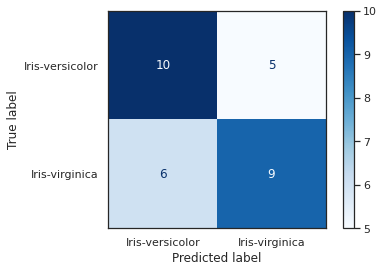

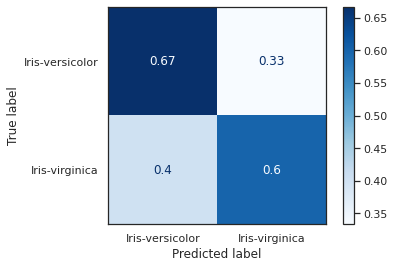

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', normalize='true')


plt.show()

### Select two classes Iris-setosa VS Iris-versicolor
#### **Observation:**
* This classification performs better than the previous. Why?

In [ ]:
#Selct two classes Iris-setosa VS Iris-versicolor
X = iris.iloc[0:100,1:3]
y = iris.iloc[0:100, -1]

print(X)
print(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    SepalLengthCm  SepalWidthCm
0             5.1           3.5
1             4.9           3.0
2             4.7           3.2
3             4.6           3.1
4             5.0           3.6
..            ...           ...
95            5.7           3.0
96            5.7           2.9
97            6.2           2.9
98            5.1           2.5
99            5.7           2.8

[100 rows x 2 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: Species, Length: 100, dtype: object


In [ ]:
#Create the SVM model
SVM_classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

print(y_pred)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor']
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[15  0]
 [ 0 15]]
accuracy is 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', normalize='true')


plt.show()

## Multiclass classification

### Select all the classes

In [ ]:
# Seperating the data into dependent and independent variables
X = iris.iloc[:,1:-1]
y = iris.iloc[:, -1]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print(X)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

### **Training** and **test** the models:

1] Support Vector Machine (SVM)

2] Decision Tree

3] Random Forests

5] Ada Boost

### **1]** Support Vector Machine (SVM)

In [ ]:
#Create the SVM model
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'rbf', random_state = 0)

#Fit the model for the data

SVM_classifier.fit(X_train, y_train)

#Test the model using the test set
y_pred = SVM_classifier.predict(X_test)


#Model evaluation
#Classification report and Confusion Matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.9777777777777777


### **2]** Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Create the model
classifier = DecisionTreeClassifier()

#Fit the model for the data
classifier.fit(X_train, y_train)

#Test the model using the test set
y_pred = classifier.predict(X_test)

#Model evaluation
#Classification report and Confusion Matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accuracy scoreì
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.9777777777777777


### **3]** Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create the model
RF_classifier = RandomForestClassifier(n_estimators=20)

#Fit the model for the data
RF_classifier.fit(X_train, y_train)


#Test the model using the test set
y_pred = RF_classifier.predict(X_test)

#Model evaluation
#Classification report and Confusion Matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy is 0.9777777777777777


### **4]** Ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#Create the model
Ab_classifier = AdaBoostClassifier(n_estimators=50, random_state=1)

#Fit the model for the data
Ab_classifier.fit(X_train, y_train)

#Test the model using the test set
y_pred = Ab_classifier.predict(X_test)

#Model evaluation
#Classification report and Confusion Matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.89      0.73      0.80        11

       accuracy                           0.91        45
      macro avg       0.91      0.89      0.90        45
   weighted avg       0.91      0.91      0.91        45

[[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]
accuracy is 0.9111111111111111


### Plot Confusion Matrix

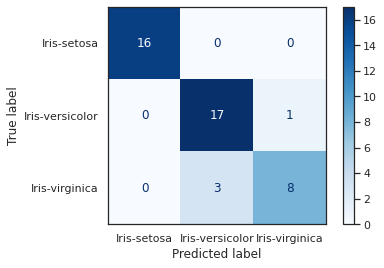

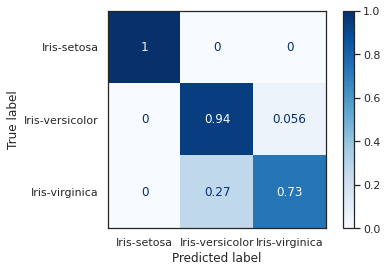

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', normalize='true')


plt.show()